# Arabic handwritten word recognition

<img src="arabic segementation words.jpg">

<img src="Text-line image preprocessing steps.jpg">

<img src="Output of segmentation stage.jpg">

<img src="Example of over-segmentation problems.jpg">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

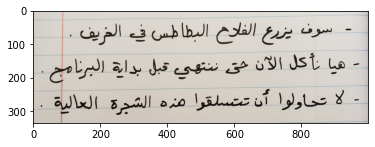

In [3]:
img = cv2.imread('arabic-handwriting-4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
    
plt.imshow(img)

### Line segmentation

In [4]:
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

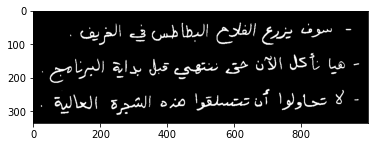

In [5]:
thresh_img = thresholding(img)

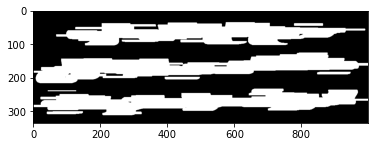

In [6]:
# dilation
kernel = np.ones((3, 85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray')

In [7]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [8]:
sorted_contours_lines = sorted(contours, key= lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

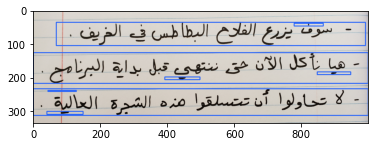

In [9]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x, y), (x+w, y+h), (40, 100, 250), 2)

plt.imshow(img2)

### Text segmentation

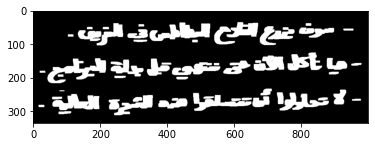

In [10]:
# dilation
kernel = np.ones((3, 15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray')

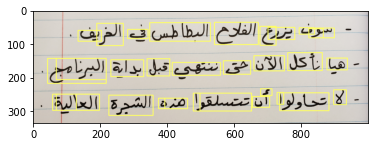

In [11]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3)

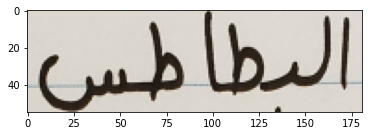

In [12]:
ninth_word = words_list[8]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

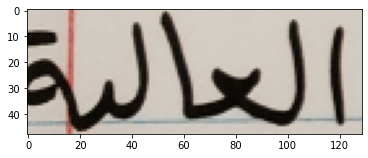

In [13]:
ninth_word = words_list[0]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

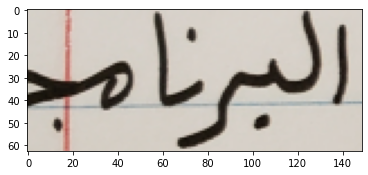

In [14]:
ninth_word = words_list[1]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

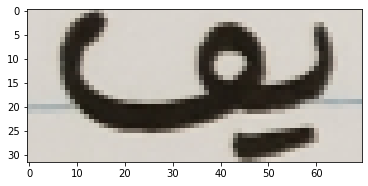

In [15]:
ninth_word = words_list[2]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


    -> Understanding text from natural images
    
    -> Text Recognition
    
    -> Text Localization

<img src="Text Detection in Natural Scene Images with Convolutional Neural Networks 1-9 screenshot.png">

In [16]:
from tensorflow import keras
model = keras.models.load_model('arabic_character_recognition.h5')

C:\Users\Afandi Soufiane\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

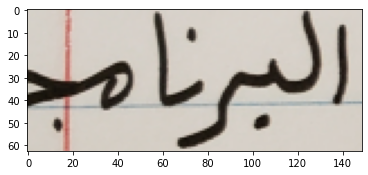

In [18]:
ninth_word = words_list[1]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

In [19]:
roi_9.shape

(63, 149, 3)

# Libraries 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict

In [22]:
import pandas as pd
import matplotlib as mpl
import traceback

# 1/ character segmentation

## 1.1 - slant-correction of the images

In [23]:
img = cv2.imread('arabic-handwriting-4.jpg',0)

In [24]:
img

array([[210, 210, 209, ..., 191, 188, 187],
       [209, 209, 209, ..., 192, 189, 189],
       [210, 209, 208, ..., 191, 187, 184],
       ...,
       [192, 193, 194, ..., 183, 185, 184],
       [193, 192, 193, ..., 184, 187, 184],
       [192, 192, 193, ..., 188, 186, 184]], dtype=uint8)

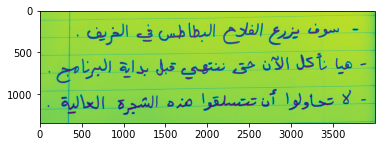

In [25]:
plt.imshow(img)

In [26]:
thresh = cv2.threshold(img,127,255,1)[1]

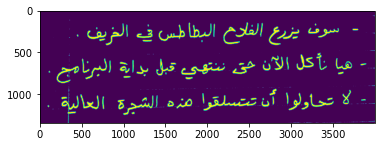

In [27]:
plt.imshow(thresh)

In [28]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 40)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

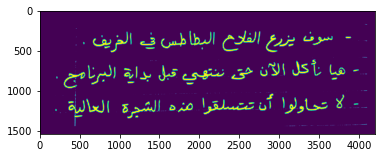

In [29]:
plt.imshow(np.pad(thresh, 100, pad_with, padder=0))

In [30]:
thresh = np.pad(thresh, 100, pad_with, padder=0)

In [31]:
# In[deskew]:
def deskew(img):
    thresh=img
    edges = cv2.Canny(thresh,50,200,apertureSize = 3)
    
    lines = cv2.HoughLines(edges,1,np.pi/1000, 55)
    try:
        d1 = OrderedDict()
        for i in range(len(lines)):
            for rho,theta in lines[i]:
                deg = np.rad2deg(theta)
#                print(deg)
                if deg in d1:
                    d1[deg] += 1
                else:
                    d1[deg] = 1
                    
        t1 = OrderedDict(sorted(d1.items(), key=lambda x:x[1] , reverse=False))
        print(list(t1.keys())[0],'Angle' ,thresh.shape)
        non_zero_pixels = cv2.findNonZero(thresh)
        center, wh, theta = cv2.minAreaRect(non_zero_pixels)
        angle=list(t1.keys())[0]
        if angle>160:
            angle=180-angle
        if angle<160 and angle>20:
            angle=12        
        root_mat = cv2.getRotationMatrix2D(center, angle, 1)
        rows, cols = img.shape
        rotated = cv2.warpAffine(img, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)
        
    except:
        rotated=img
        pass
    return rotated

In [32]:
deskew(thresh)

7.379999 Angle (1540, 4197)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
def unshear(img):

    gray = img
    thresh = img.copy()
    #print(thresh)
    plt.imshow(thresh)
    plt.show()
    trans = thresh.transpose()

    arr=[]
    for i in range(thresh.shape[1]):
        arr.insert(0,trans[i].sum())

    arr=[]
    for i in range(thresh.shape[0]):
        arr.insert(0,thresh[i].sum())
    
    y = thresh.shape[0]-1-np.nonzero(arr)[0][0]
    y_top = thresh.shape[0]-1-np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1=[]
    for i in range(trans1.shape[0]):
        sum1.insert(i,trans1[i].sum())

    height = y - y_top
    max_value = 255*height
    prev_num = len([i for i in sum1 if i>=(0.6*max_value)])
    final_ang = 0

    # # print(arr)
    # # print(x,y)
    for ang in range(-25,25,3):
        thresh = gray.copy()
        #print(thresh[0].shape)
        #print(ang)
        print('Ang',ang)
        if ang>0:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size-move]=temp[move:]
                thresh[i][temp.size-move:] = [0 for m in range(move)]
        else:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                #print(temp[:-3])
                #print(temp[:temp.size-move].shape, thresh[i][move%temp.size:].shape)
                thresh[i][move:]=temp[:temp.size-move]
                thresh[i][:move]=[0 for m in range(move)]

#         plt.imshow(thresh)
#         plt.show()
        trans1 = thresh.transpose()
        sum1=[]
        for i in range(trans1.shape[0]):
            sum1.insert(i,trans1[i].sum())
        #print(sum1)
        num = len([i for i in sum1 if i>=(0.60*max_value)])
        #print(num, prev_num)
        if(num>=prev_num):
            prev_num=num
            final_ang = ang
        #plt.imshow(thresh)
        #plt.show()
    #print("final_ang:", final_ang)

    thresh= gray.copy()
    if final_ang>0:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size-move]=temp[move:]
            thresh[i][temp.size-move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(-final_ang))))
            #print(move)
            if move >= temp.size:
                move = temp.size
            thresh[i][move:]=temp[:temp.size-move]
            thresh[i][:move]=[0 for m in range(move)]

#    plt.imshow(thresh)
#    plt.show()
    return thresh

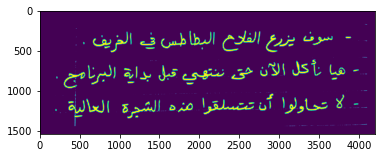

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


In [34]:
sheared_img = unshear(thresh)

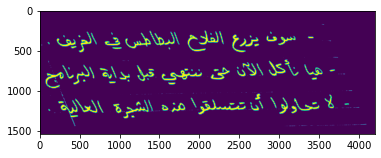

In [35]:
plt.imshow(sheared_img)

In [36]:
ret, thresh = cv2.threshold(sheared_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [37]:
print(ret,'\n', thresh.shape)

0.0 
 (1540, 4197)


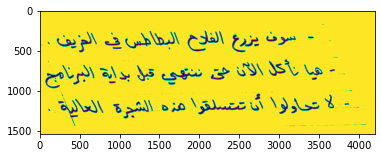

In [38]:
plt.imshow(thresh)

## 1.2 - word and character segmentation

In [39]:
mpl.rcParams['legend.fontsize'] = 10
pd.set_option('display.expand_frame_repr', False)
fn=0
path='./result/'

In [40]:
# In[findFeaturPoints]
def findCapPoints(img):
    cpoints=[]
    dpoints=[]
    for i in range(img.shape[1]):
        col = img[:,i:i+1]
        k = col.shape[0]
        while k > 0:
            if col[k-1]==255:
                dpoints.append((i,k))
                break
            k-=1
        
        for j in range(col.shape[0]):
            if col[j]==255:
                cpoints.append((i,j))
                break
    return cpoints,dpoints

In [41]:
# In[wordSegment]
def wordSegment(textLines):
    wordImgList=[]
    counter=0
    cl=0
    for txtLine in textLines:
        gray = cv2.cvtColor(txtLine, cv2.COLOR_BGR2GRAY)
        th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
        final_thr = cv2.dilate(threshed,None,iterations = 20)

        plt.imshow(final_thr)
        plt.show()
        
        contours, hierarchy = cv2.findContours(final_thr,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        boundingBoxes = [cv2.boundingRect(c) for c in contours]
        (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))
       
        for cnt in contours:
            area = cv2.contourArea(cnt)
 
        #   print area
            if area > 10000:
                print ('Area= ',area)
                x,y,w,h = cv2.boundingRect(cnt)
                print (x,y,w,h)
                letterBgr = txtLine[0:txtLine.shape[1],x:x+w]
                wordImgList.append(letterBgr)
 
                cv2.imwrite("./result/words/" + str(counter) +".jpg",letterBgr)
                counter=counter+1
        cl=cl+1
       
    return wordImgList

In [42]:
# In[fitToSize]
def fitToSize(thresh1):
    
    mask = thresh1 > 0
    coords = np.argwhere(mask)

    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top
    cropped = thresh1[x0:x1,y0:y1]
    return cropped

In [57]:
# In[lineSegment]
def lineSegment(img):
    img = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
   
    upper=[]
    lower=[]
    flag=True
    for i in range(threshed.shape[0]):

        col = threshed[i:i+1,:]
        cnt=0
        if flag:
            cnt=np.count_nonzero(col == 255)
            if cnt >0:
                upper.append(i)
                flag=False
        else:
            cnt=np.count_nonzero(col == 255)
            if cnt <2:
                lower.append(i)
                flag=True
    textLines=[]
    if len(upper)!= len(lower):lower.append(threshed.shape[0])
#    print upper
#    print lower
    for i in range(len(upper)):
        timg=img[upper[i]:lower[i],0:]
        
        if timg.shape[0]>5:
#            plt.imshow(timg)
#            plt.show()
            timg=cv2.resize(timg,((timg.shape[1]*5,timg.shape[0]*8)))
            textLines.append(timg)

    return textLines

In [44]:
# In[baselines]:
def baselines(letter2, upoints, dpoints):
##-------------------------Creating upper baseline-------------------------------##
    colu = []
    for i in range(len(upoints)):
        colu.append(upoints[i][1])
    
    maxyu = max(colu)
    minyu = min(colu)
    avgu = (maxyu + minyu) // 2
    meanu = np.around(np.mean(colu)).astype(int)
    print('Upper:: Max, min, avg, mean:: ',maxyu, minyu, avgu, meanu)
##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 1--------------------------##
    cold = []
    for i in range(len(dpoints)):
        cold.append(dpoints[i][1])
    
    maxyd = max(cold)
    minyd = min(cold)
    avgd = (maxyd + minyd) // 2
    meand = np.around(np.mean(cold)).astype(int)
    print('Lower:: Max, min, avg, mean:: ',maxyd, minyd, avgd, meand)
    
##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 2---------------------------##
    cn = []
    count = 0

    for i in range(h):
        for j in range(w):
            if(letterGray[i,j] == 255):
                count+=1
        if(count != 0):
            cn.append(count)
            count = 0    
    maxindex = cn.index(max(cn))
    print('Max pixels at: ',maxindex)

##------------------Printing upper and lower baselines-----------------------------##
    
    cv2.line(letter2,(0,meanu),(w,meanu),(255,0,0),2)
    lb = 0
    if(maxindex > meand):
        lb = maxindex
        cv2.line(letter2,(0,maxindex),(w,maxindex),(255,0,0),2)
    else:
        lb = meand
        cv2.line(letter2,(0,meand),(w,meand),(255,0,0),2)
        
    plt.imshow(letter2)
    plt.show()
    return meanu, lb

In [45]:
# In[histogram]:

def histogram(letter2, upper_baseline, lower_baseline):
    ##------------Making Histograms (Default)------------------------######
    cropped = letter2[upper_baseline:lower_baseline,0:w]
    plt.imshow(cropped)
    plt.show()
    colcnt = np.sum(cropped==255, axis=0)
    x = list(range(len(colcnt)))
    plt.plot(colcnt)
    plt.fill_between(x, colcnt, 1, facecolor='blue', alpha=0.5)
    plt.show()  
    return colcnt   

In [46]:
# In[Visualize]:
##*******************************************************************************###
def visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold):
    seg = []
    seg1 = []
    seg2 = []
   ## Check if pixel count is less than min_pixel_threshold, add segmentation point
    for i in range(len(colcnt)):
        if(colcnt[i] < min_pixel_threshold):
            seg1.append(i)
          
    ## Check if 2 consequtive seg points are greater than min_separation_threshold in distance
    for i in range(len(seg1)-1):
        if(seg1[i+1]-seg1[i] > min_separation_threshold):
            seg2.append(seg1[i])

##------------Modified segmentation for removing circles----------------------------###            
    arr=[]
    for i in (seg2):
        arr1 = []
        j = upper_baseline
        while(j <= lower_baseline):
            if(letterGray[j,i] == 255):
                arr1.append(1)
            else:
                arr1.append(0)
            j+=1
        arr.append(arr1)
    print('At arr Seg here: ', seg2)
    
    ones = []
    for i in (arr):
        ones1 = []
        for j in range(len(i)):
            if (i[j] == 1):
                ones1.append([j])
        ones.append(ones1)
    
    diffarr = []
    for i in (ones):
        diff = i[len(i)-1][0] - i[0][0]
        diffarr.append(diff)
    print('Difference array: ',diffarr)
    
    for i in range(len(seg2)):
        if(diffarr[i] < min_round_letter_threshold):
            seg.append(seg2[i])
##---------------------------------------------------------------------------##
    ## Make the Cut 
    for i in range(len(seg)):
        letter3 = cv2.line(letter2,(seg[i],0),(seg[i],h),(255,0,0),2)
    
    print("Does it work::::")
    plt.imshow(letter3)
    plt.show()
    return seg 

In [47]:
# In[segmentCharacters]
def segmentCharacters(seg,lettergray):
    s=0
    wordImgList = []
    global fn
    for i in range(len(seg)):
        if i==0:
            s=seg[i]
            if s > 15:
                wordImg = lettergray[0:,0:s]
                cntx=np.count_nonzero(wordImg == 255) 
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
            else:
                continue
        elif (i != (len(seg)-1)):
            if seg[i]-s > 15:
                wordImg = lettergray[0:,s:seg[i]]
                cntx=np.count_nonzero(wordImg == 255) 
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
                s=seg[i]
            else:
                continue
        else:
            wordImg = lettergray[0:,seg[len(seg)-1]:]
            cntx=np.count_nonzero(wordImg == 255) 
            print ('count',cntx)
            plt.imshow(wordImg)
            plt.show()
            fn=fn+1
        wordImgList.append(wordImg)

    return wordImgList


In [48]:
img = thresh

No. of Lines 7


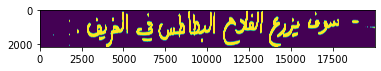

Area=  26093.5
2185 1132 129 249
Area=  493707.0
2798 756 1180 854
Area=  21786.5
3332 454 113 225
Area=  74287.0
3516 1533 391 263
Area=  506222.5
3909 98 1123 2078
Area=  28790.5
4279 439 141 240
Area=  117501.0
5125 208 134 1186
Area=  406896.5
5751 662 988 848
Area=  107399.5
6106 1653 598 215
Area=  21326.5
6408 184 108 227
Area=  751422.0
7066 209 1601 1584
Area=  795769.5
8852 12 1404 1508
Area=  22716.0
9609 1669 114 233
Area=  126290.0
10323 126 133 1295
Area=  510603.0
10921 417 1018 1679
Area=  692165.0
11656 0 1409 1421
Area=  21557.0
12597 223 116 217
Area=  146481.5
13111 46 204 1334
Area=  475145.0
13636 386 747 1790
Area=  453505.0
14122 657 1362 950
Area=  25807.0
15010 473 126 238
Area=  76044.5
15049 1305 351 295
Area=  248472.5
15977 509 702 591
Area=  22129.0
16384 107 114 225
Area=  391360.0
16570 531 1279 933
Area=  67759.5
18626 594 380 198
Area=  11896.5
19776 990 209 78


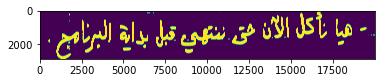

Area=  21788.0
503 1680 119 214
Area=  726493.0
974 1230 1369 1634
Area=  31107.5
1594 2037 169 279
Area=  11113.0
1687 1793 92 163
Area=  222004.5
2491 529 476 1382
Area=  490028.5
2695 509 1318 1992
Area=  23971.0
2784 753 118 236
Area=  38021.5
3376 1977 182 261
Area=  129652.5
4080 707 169 1177
Area=  258071.0
4745 1225 619 704
Area=  96412.5
4748 834 486 314
Area=  84861.0
4970 2172 455 214
Area=  132019.5
5492 645 122 1226
Area=  252527.0
5744 1194 727 823
Area=  28820.5
6168 1992 151 229
Area=  560365.5
6919 538 1120 1621
Area=  20787.5
7454 1843 115 203
Area=  66579.5
7783 913 356 208
Area=  1098387.0
8405 1033 2647 1063
Area=  98601.0
8663 2264 471 260
Area=  54110.5
10028 893 269 249
Area=  21468.5
10440 956 121 204
Area=  19771.5
10899 945 109 215
Area=  562533.5
11466 745 1388 1270
Area=  66143.5
11852 932 351 237
Area=  195732.0
13278 987 498 702
Area=  24501.0
13372 707 123 239
Area=  470533.5
13779 248 756 1390
Area=  135633.5
14682 356 182 1240
Area=  648664.0
15296 107

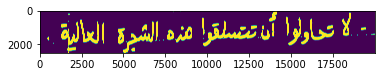

Area=  23748.0
440 1538 125 223
Area=  78845.0
1257 753 374 260
Area=  538246.5
1266 651 1067 1384
Area=  107148.0
1632 2116 535 288
Area=  590485.5
2389 511 1151 1447
Area=  141105.0
3693 696 151 1258
Area=  293480.0
4630 1019 432 956
Area=  694302.0
4944 621 1840 1882
Area=  44284.5
5455 2186 215 241
Area=  89133.5
6074 795 321 428
Area=  110619.5
6895 610 137 1164
Area=  200571.0
7583 1124 429 609
Area=  413799.5
8126 926 969 955
Area=  32901.0
8394 909 174 228
Area=  109187.5
9668 410 149 1014
Area=  1125815.5
9733 593 3182 1516
Area=  63155.0
10285 729 390 226
Area=  61908.0
11952 933 342 224
Area=  72099.5
12560 858 382 238
Area=  184104.0
13206 1123 494 611
Area=  26923.0
13255 861 125 248
Area=  157968.0
13678 0 456 642
Area=  91738.0
13850 715 138 810
Area=  124890.5
14667 353 175 1122
Area=  397708.0
14821 378 776 1677
Area=  191755.0
15586 1237 470 756
Area=  499553.5
16081 457 1452 1284
Area=  69786.5
17129 845 350 272
Area=  350851.5
18037 102 531 1387
Area=  45041.5
19147

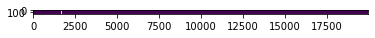

Area=  17707.0
1655 0 92 200


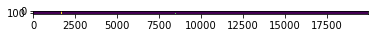

Area=  14211.0
1655 0 92 160


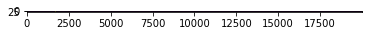

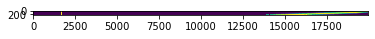

Area=  22002.0
1648 0 98 240
Area=  391804.0
14159 17 5826 223
No. of Words 97
LetterGray shape:  (2176, 129, 3)
Upper:: Max, min, avg, mean::  117 0 58 23
Lower:: Max, min, avg, mean::  212 123 167 193
Max pixels at:  117


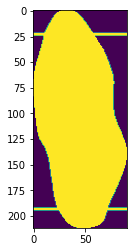

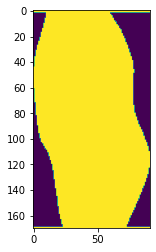

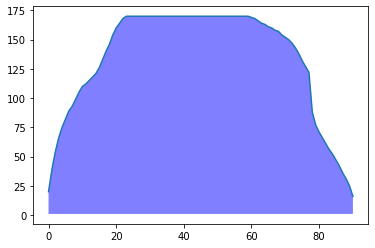

At arr Seg here:  [0]
Difference array:  [79]
Does it work::::


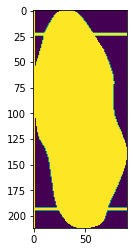

LetterGray shape:  (2176, 1180, 3)
Upper:: Max, min, avg, mean::  1532 0 766 596
Lower:: Max, min, avg, mean::  1697 724 1210 1140
Max pixels at:  808


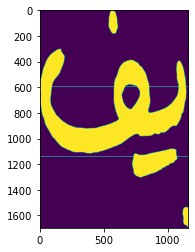

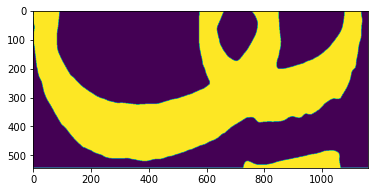

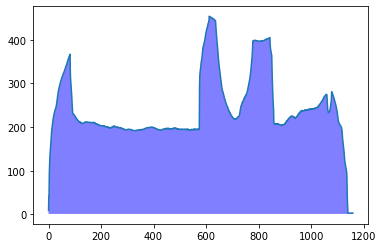

At arr Seg here:  [0]
Difference array:  [127]
Does it work::::


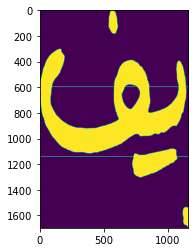

LetterGray shape:  (2176, 113, 3)
Upper:: Max, min, avg, mean::  890 0 445 203
Lower:: Max, min, avg, mean::  1087 1049 1068 1071
Max pixels at:  647


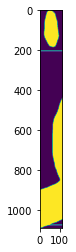

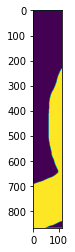

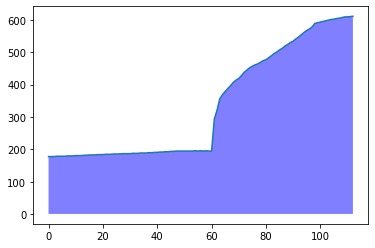

At arr Seg here:  []
Difference array:  []
Does it work::::
Error Message  local variable 'letter3' referenced before assignment


Traceback (most recent call last):
  File "<ipython-input-58-da69a7b720b7>", line 36, in <module>
    seg = visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold)
  File "<ipython-input-46-2ebec855190b>", line 54, in visualize
    plt.imshow(letter3)
UnboundLocalError: local variable 'letter3' referenced before assignment


In [58]:
try:
    textLines=lineSegment("arabic-handwriting-4.jpg")
    print ('No. of Lines',len(textLines))
    imgList=wordSegment(textLines)
    print ('No. of Words',len(imgList))
    counter = 0
    for letterGray in imgList:
        print ('LetterGray shape: ',letterGray.shape)
        gray = cv2.cvtColor(letterGray, cv2.COLOR_BGR2GRAY)
        th, letterGray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
        letterGray = fitToSize(letterGray)
        letter2 = letterGray.copy()
        letterGray = cv2.dilate(letterGray,None,iterations = 4)

        h = letterGray.shape[0]
        w = letterGray.shape[1]
        
        upoints, dpoints=findCapPoints(letterGray)        
        meanu, lb = baselines(letter2, upoints, dpoints)
        
##-----------Final Baseline row numbers-----------------------####
#       Ignore all points avove and below these rows 
        upper_baseline = meanu
        lower_baseline = lb
        
##--------------------Make histogram-------------------------------------###   
        
        colcnt = histogram(letter2, upper_baseline, lower_baseline)
        
###------------------------Visualize segmentation------------------------------#####        
        ## Tuning Parameters
        min_pixel_threshold = 25
        min_separation_threshold = 35
        min_round_letter_threshold = 190
        
        seg = visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold)
        wordImgList = segmentCharacters(seg,letterGray)
        for i in wordImgList:
            cv2.imwrite("./result/characters/" + str(counter) +".jpeg",i)
            counter=counter+1
        
###---------------------------------------------------------------------------#####        
        
    print('Original Image')         
    plt.imshow(img)
    plt.show()

except Exception as e:
    print ('Error Message ',e)
    cv2.destroyAllWindows()
    traceback.print_exc()
    pass
